**Задание**

Цель: закрепить знания о математическом смысле метрик TPR, FPR. Изучить построение ROC-кривой, графика Precision-Recall.

**Описание задания:**

Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

**Этапы работы:**

1. Преобразуйте данные:

a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;

b. закодируйте категориальные переменные числовыми значениями по необходимости.
2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.

3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.

4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.

7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.

8. *Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.

9. Сформулируйте выводы по проделанной работе:

a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?

b. *может ли ROC-кривая проходить ниже диагонали?

In [ ]:
# Импорт библиотек
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

**1. Преобразуйте данные:**

**a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;**

In [ ]:
# Открытие файла
df_athletes = pd.read_csv('athletes.csv')
df_athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [ ]:
# Общая информация о датасете
df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Колонки 'dob', 'height' и 'weight' содержат null-значения.

In [ ]:
# Проверка на наличие пропусков
df_athletes[df_athletes['weight'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659 entries, 12 to 11517
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           659 non-null    int64  
 1   name         659 non-null    object 
 2   nationality  659 non-null    object 
 3   sex          659 non-null    object 
 4   dob          658 non-null    object 
 5   height       350 non-null    float64
 6   weight       0 non-null      float64
 7   sport        659 non-null    object 
 8   gold         659 non-null    int64  
 9   silver       659 non-null    int64  
 10  bronze       659 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 61.8+ KB


In [ ]:
# Удаление ячеек с пропусками
df = df_athletes[~(df_athletes['height'].isna())]
df = df[~(df['weight'].isna())]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


**b. закодируйте категориальные переменные числовыми значениями по необходимости.**

In [ ]:
# Названия колонок
df.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')

In [ ]:
# Предсказывать будем пол атлета.
# Колонки 'id', 'name', 'dob' использовать не будем:
df = df.drop(columns=['id', 'name', 'dob'])
df.head()

,nationality,sex,height,weight,sport,gold,silver,bronze
0,ESP,male,1.72,64.0,athletics,0,0,0
1,KOR,female,1.68,56.0,fencing,0,0,0
2,CAN,male,1.98,79.0,athletics,0,0,1
3,MDA,male,1.83,80.0,taekwondo,0,0,0
4,NZL,male,1.81,71.0,cycling,0,0,0


In [ ]:
# Чтобы составить представление о степени сбалансированности классов, подсчитаем количество строк, относящихся к мужчинам и женщинам:
len(df[df['sex'] == 'male']), len(df[df['sex'] == 'female'])

(5862, 4996)

Существеннного преобладания количества объектов одного класса над другим нет.

In [ ]:
# Категориальные переменные в колонках 'nationality' и 'sport' переведем в числовые.
# Сформируем датафрейм X с признаками:
X = pd.get_dummies(df, columns=['nationality', 'sport'])
X.head()

,sex,height,weight,gold,silver,bronze,nationality_AFG,nationality_ALB,nationality_ALG,nationality_AND,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,male,1.72,64.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,female,1.68,56.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,male,1.98,79.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,male,1.83,80.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,male,1.81,71.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.shape

(10858, 233)

In [ ]:
# Перевод целевой категориальной переменной в числовую с помощью LabelEncoder:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
LE.fit(df_athletes['sex'])

LabelEncoder()

In [ ]:
# Серия с целевой переменной в числовом формате:
y = pd.Series(LE.transform(df['sex']))
y[:5]

0    1
1    0
2    1
3    1
4    1
dtype: int64

In [ ]:
# Из датафрейма с признаками удалим колонку с целевой переменной:
X = X.drop(columns = ['sex'])
X.shape

(10858, 232)

**2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)

Обучение модели логистической регрессии.
Т.к. в датасете X есть признаки, значения которых значительно отличаются от 0 и 1, стандартизируем их с помощью StandartScaler(). Для удобства стандартизацию и лог. регрессию оформим в pipeline.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [ ]:
# Непосредственно обучение
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
# Предсказанные классы:
pred_classes = model.predict(X_test)
pred_classes

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
# Вероятности предсказанных классов объектов тестовой выборки:
probabilities = model.predict_proba(X_test)
probabilities

array([[0.00928745, 0.99071255],
       [0.18301162, 0.81698838],
       [0.38384615, 0.61615385],
       ...,
       [0.97438491, 0.02561509],
       [0.2037005 , 0.7962995 ],
       [0.29515376, 0.70484624]])

**3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.**

In [ ]:
# Импорт модулей для вычисления и построения ROC-кривой:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

In [ ]:
# Вычисление значений для построения ROC-кривой:
fpr, tpr, threshholds = roc_curve(y_test, probabilities[:, 1])

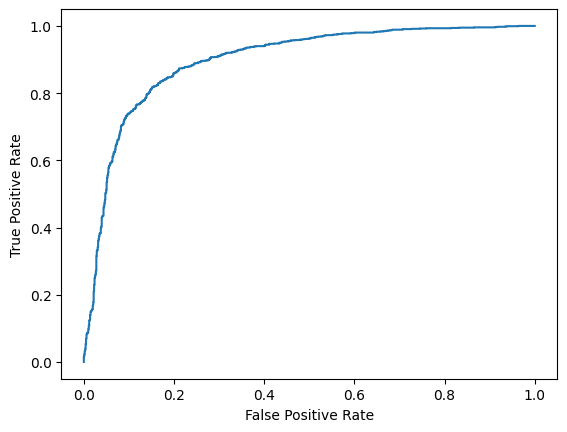

In [ ]:
# Построение ROC-кривой:
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

**4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.**

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test, probabilities[:, 1])

0.8970133263786614

**5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.**

Функция `roc_func` для вычисления tp, fp, tn и fn - результатов классификации объектов в соответствии с матрицей ошибок для каждого порогового значения вероятности.

Аргументы функции:
  
*   `y_probabilities` - массив с вычисленными заранее вероятностями объектов быть первым классом;
*   `y_class` - серия с реальными классами объектов;
*   `thresholds` - массив с пороговыми значениями вероятности.

In [ ]:
def roc_func(y_probabilities, y_class, thresholds):

# Значения tp, fp, tn и fn будем собирать в список results (в результате получим список списков):
  results = []
  for el in thresholds:
# Вычисления tp, fp, tn и fn для каждого порога производятся заново,
# поэтому после задания порога начальные значения tp, fp, tn и fn обнуляем:
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    for probability, y in zip(y_probabilities, y_class):
      if probability >= el:
        prediction = 1
      else: prediction = 0

      if prediction == 1:
        if y == 1:
          tp += 1
        else:
          fp += 1
      else:
        if y == 1:
          fn += 1
        else:
          tn += 1
    results.append([tp, fp, tn, fn])

  return results

In [ ]:
# Массивы с вычисленными вероятностями и с порогами:
y_probabilities = probabilities[:, 1]
thresholds = np.arange(0, 1.1, 0.1)
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
# Получение массива с результатами (tp, fp, tn и fn):
res = roc_func(y_probabilities, y_test, thresholds)
res

[[1164, 1008, 0, 0],
 [1141, 620, 388, 23],
 [1109, 449, 559, 55],
 [1079, 344, 664, 85],
 [1035, 255, 753, 129],
 [986, 189, 819, 178],
 [936, 148, 860, 228],
 [853, 97, 911, 311],
 [751, 72, 936, 413],
 [571, 48, 960, 593],
 [0, 0, 1008, 1164]]

Подсчет метрик TPR и FPR.

In [ ]:
fpr_list = []
tpr_list = []

for row in res:
  fpr_hand = row[1] / (row[1] + row[2])
  tpr_hand = row[0] / (row[0] + row[3])
  fpr_list.append(fpr_hand)
  tpr_list.append(tpr_hand)

fpr_list, tpr_list

([1.0,
  0.6150793650793651,
  0.44543650793650796,
  0.3412698412698413,
  0.25297619047619047,
  0.1875,
  0.14682539682539683,
  0.09623015873015874,
  0.07142857142857142,
  0.047619047619047616,
  0.0],
 [1.0,
  0.9802405498281787,
  0.9527491408934707,
  0.9269759450171822,
  0.8891752577319587,
  0.8470790378006873,
  0.8041237113402062,
  0.7328178694158075,
  0.6451890034364262,
  0.49054982817869414,
  0.0])

**6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.**

ROC-кривую, полученную с помощью sklearn, сделаем сплошной красной, полученную вручную - зелено-голубой с маркерами-кружочками.

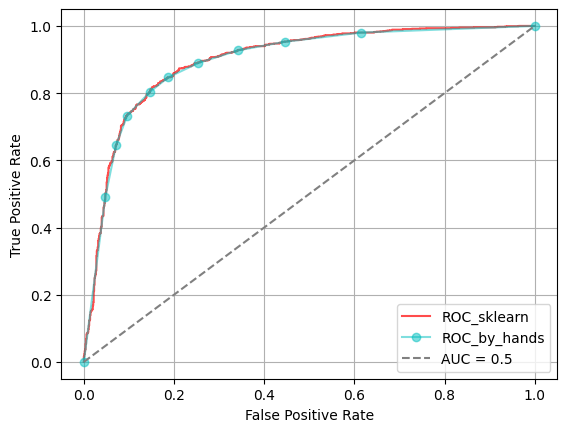

In [ ]:
plt.plot(fpr, tpr, label = 'ROC_sklearn', color='r', alpha = 0.7)
plt.plot( fpr_list, tpr_list, label = 'ROC_by_hands', color = 'c', marker = 'o', alpha = 0.5 )
line_x = [0, 1]
line_y = [0, 1]
plt.plot(line_x, line_y, label = 'AUC = 0.5', color = 'grey', linestyle = '--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.grid()
plt.show()

ROC-кривые накладываются друг на друга и совпадают.

**7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.**

In [ ]:
# Метрика Recall равна TPR и уже рассчитана выше.
# Значения метрики Precision для всех значений порога соберем в список:

precision_list = []

for row in res:
  if row[0] != 0 or row[1] != 0: # Чтобы избежать деления на ноль (последний элемент списка res содержит нулевые значения)
    pr = row[0] / (row[0] + row[1])
  else:
    continue
  precision_list.append(pr)

precision_list

[0.5359116022099447,
 0.6479273140261215,
 0.7118100128369704,
 0.758257203092059,
 0.8023255813953488,
 0.8391489361702128,
 0.8634686346863468,
 0.8978947368421053,
 0.9125151883353585,
 0.9224555735056543]

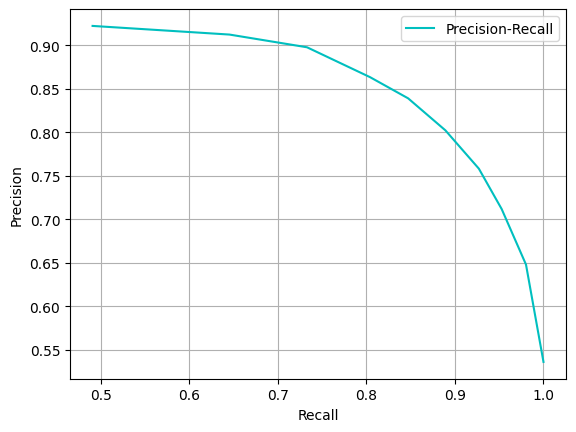

In [ ]:
# График Precision-Recall:
plt.plot(tpr_list[:-1], precision_list, label = 'Precision-Recall', color = 'c') # Из списка значенй Recall убераем последний элемент, чтобы количество координат по обеим осям было одинаковым
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend()
plt.grid()
plt.show()

**8. *Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.**

Для решения данной задачи с помощью библиотеки scipy выполним следующее:

1)  по рассчитанным значениям fpr и tpr подберем функцию, которая описывает ROC-кривую;

2)  вычислим определенный интеграл полученной в п.1 функции в пределах от 0 до 1 (его значение и будет площадью под кривой ROC).

In [ ]:
# Импорт необходимых модулей
import scipy
from scipy.optimize import curve_fit
from scipy.integrate import quad

In [ ]:
# Из списков с метриками FPR и TPR получим массивы Numpy:
x_roc = np.array(fpr_list)
y_roc = np.array(tpr_list)

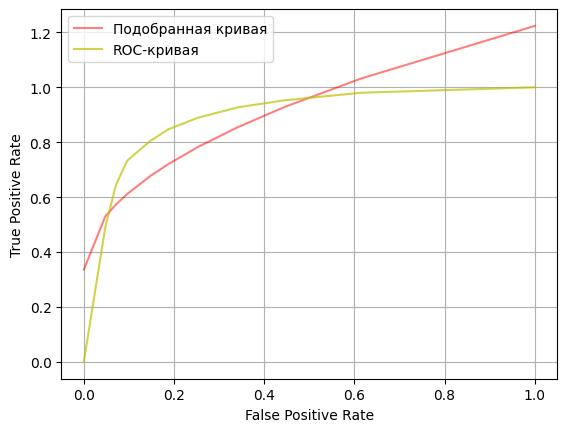

In [ ]:
# Простейшая функция, на которую похожа ROC-кривая - это функция y = sqrt(x).
# С учетом коэффициентов a и b определеим функцию в виде:
def f(x, a, b):
  return (x * a) ** (1/2) + b


# Для подбора коэффициентов воспользуемся методом curve_fit,
# начальные значения коэффициентов a и b зададим равными 0.
res = curve_fit(f, x_roc, y_roc, p0 = [0, 0])


# Построим :
plt.plot(x_roc, f(x_roc, res[0][0], res[0][1]), label = 'Подобранная кривая', color='red', alpha = 0.5)
plt.plot(fpr_list, tpr_list, label = 'ROC-кривая', color='y', alpha = 0.7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.grid()
plt.show()

In [ ]:
# Коэффициенты a и b:
res[0][0], res[0][1]

(0.7873008848983853, 0.3362432874026999)

In [ ]:
# Подсчитаем определенный интеграл найденной функции с помощью функции quad библиотеки scipy:
a = res[0][0]
b = res[0][1]
I = quad(f, 0, 1, args=(a, b))
I

(0.9277764685508774, 1.0300387970906016e-15)

Первое значение в полученном кортеже - значение интеграла, второе - значение ошибки. Таким образом, метрика ROC-AUC получилась равной 0,928 (незначительно превышает значение, рассчитанное в п. 4 (0,897)).

In [ ]:
0.928-0.897

0.031000000000000028

**9. Сформулируйте выводы по проделанной работе:**

**a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?**

Форма кривой ROC-AUC больше похожа на ступенчатую функцию, чем на прямую, соответствующую порогу 0,5, что говорит в пользу довольно высокого качества модели (площадь под кривой близка к 1, это подтверждает метрика ROC-AUC, равная 0,897).
Второй график Precision-Recall также имеет значительный изгиб, что делает площадь под ним близкой к 1, и говорит о высоком качестве модели.

**b. *может ли ROC-кривая проходить ниже диагонали?**

Может в случае, если модель будет делать неправильный прогноз "специально". Ниже иллюстрация такой ситуации (на примере тоже же функции, что использовалась выше, но с заменой предсказанных классов на противопложные).

In [ ]:
def wrong_pred (y_probabilities, y_class, thresholds):

  results2 = []
  for el in thresholds:
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    for probability, y in zip(y_probabilities, y_class):
      if probability >= el:
# Поменяем значения prediction на противоположные:
        prediction = 0
      else: prediction = 1

      if prediction == 1:
        if y == 1:
          tp += 1
        else:
          fp += 1
      else:
        if y == 1:
          fn += 1
        else:
          tn += 1
    results2.append([tp, fp, tn, fn])

  return results2

In [ ]:
# Массивы с вычисленными вероятностями и с порогами:
y_probabilities2 = probabilities[:, 1]
thresholds2 = np.arange(0, 1.1, 0.1)
thresholds2

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
res2 = wrong_pred(y_probabilities2, y_test, thresholds2)

In [ ]:
fpr_list2 = []
tpr_list2 = []

for row in res2:
  fpr_hand2 = row[1] / (row[1] + row[2])
  tpr_hand2 = row[0] / (row[0] + row[3])
  fpr_list2.append(fpr_hand2)
  tpr_list2.append(tpr_hand2)

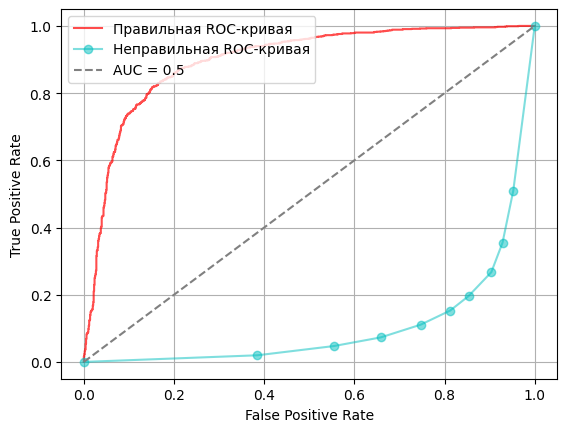

In [ ]:
# Визуализация
# ROC-кривая для правильной классификации:
plt.plot(fpr, tpr, label = 'Правильная ROC-кривая', color='r', alpha = 0.7)
# ROC-кривая для заведомо неправильной классификации:
plt.plot( fpr_list2, tpr_list2, label = 'Неправильная ROC-кривая', color = 'c', marker = 'o', alpha = 0.5 )
line_x = [0, 1]
line_y = [0, 1]
plt.plot(line_x, line_y, label = 'AUC = 0.5', color = 'grey', linestyle = '--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc = 2)
plt.grid()
plt.show()